<a href="https://colab.research.google.com/github/Arrangonsalves/Image-Classification-Using-CNN/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Common
import os
import keras
import numpy as np
import pandas as pd
import tensorflow as tf

# Data 
import cv2 as cv
from glob import glob
from tqdm import tqdm
import tensorflow.data as tfd

# Data Visualization
import matplotlib.pyplot as plt

# Data Augmentation
from keras.models import Sequential
from keras.layers import Input
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomContrast

# Model Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model 
from keras.models import load_model
from keras.layers import GlobalAveragePooling2D as GAP, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.applications import ResNet50, ResNet152, ResNet50V2, ResNet152V2, InceptionV3, MobileNet

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
os.listdir("/content/gdrive/MyDrive/PR_dataset")

['train-cat-rabbit', 'val-cat-rabbit', 'test-images']

In [9]:
# Specify the Root path
train_path = "/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/"
valid_path = "/content/gdrive/MyDrive/PR_dataset/val-cat-rabbit/"
test_path = "/content/gdrive/MyDrive/PR_dataset/test-images/"

In [10]:


# Collect the Class Names
class_names = sorted(os.listdir(train_path))
n_classes = len(class_names)

# Show
print("{:15} : {}".format("Class Names", class_names))
print("{:15} : {}".format("No. of Classes", n_classes))

Class Names     : ['cat', 'rabbit']
No. of Classes  : 2


In [11]:
def collect_filepaths(root_path:str, class_names:list, shuffle:bool = True) -> list:
    '''
    
    It collects image paths from all classes and returns a shuffled list/list of all the file paths.
    
    Inputs :
        root_path   : The part to the main directory where the classes are stored.
        class_names : Name of the subdirectories is present in the main directory i.e The class names.
        shuffle     : True or false, depending on the need of shuffling the order of the file paths.
    
    Output :
        all_filepaths : It is a list of collections of all the paths.
        
    '''
    
    all_filepaths = []
    
    # Collect Filepaths for each class
    for name in tqdm(class_names, desc="Collecting "):
        class_path = root_path + f"{name}/"
        
        # Collect the filepath on this class
        filepaths = sorted(glob(class_path + "*.jpg"))
        
        # Store all paths
        for path in filepaths:
            all_filepaths.append(path)
#Shuffle the file paths --> It is necessary
    if shuffle:
        np.random.shuffle(all_filepaths)
    
    # return the list
    return all_filepaths

In [12]:
# Get all image paths
train_image_paths = collect_filepaths(train_path, class_names, shuffle=False)
# Shuffle the set to false for demonstrative purposetrain_image_paths = collect_filepaths(root_path, class_names, shuffle=False) # Shuffle the set to false for demonstrative purpose

In [13]:
print(f"Total Number of Images : {len(train_image_paths)}")

Total Number of Images : 1600


In [14]:
train_image_paths[:10]

['/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/cat/cat.1.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/cat/cat.10.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/cat/cat.100.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/cat/cat.101.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/cat/cat.102.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/cat/cat.103.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/cat/cat.104.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/cat/cat.105.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/cat/cat.106.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/cat/cat.107.jpg']

In [15]:
# Get all image paths : This time with shuffle.
train_image_paths = collect_filepaths(train_path, class_names, shuffle=True)
valid_image_paths = collect_filepaths(valid_path, class_names, shuffle=True)
test_image_paths  = collect_filepaths(test_path,  class_names, shuffle=True)

In [16]:
train_image_paths[:10]

['/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/rabbit/rabbit.73.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/cat/cat.89.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/cat/cat.116.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/cat/cat.152.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/cat/cat.288.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/cat/cat.703.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/rabbit/rabbit.704.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/rabbit/rabbit.142.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/rabbit/rabbit.490.jpg',
 '/content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/rabbit/rabbit.679.jpg']

In [17]:
valid_image_paths[:10]

['/content/gdrive/MyDrive/PR_dataset/val-cat-rabbit/rabbit/rabbit.159.jpg',
 '/content/gdrive/MyDrive/PR_dataset/val-cat-rabbit/rabbit/rabbit.152.jpg',
 '/content/gdrive/MyDrive/PR_dataset/val-cat-rabbit/rabbit/rabbit.188.jpg',
 '/content/gdrive/MyDrive/PR_dataset/val-cat-rabbit/rabbit/rabbit.186.jpg',
 '/content/gdrive/MyDrive/PR_dataset/val-cat-rabbit/rabbit/rabbit.11.jpg',
 '/content/gdrive/MyDrive/PR_dataset/val-cat-rabbit/rabbit/rabbit.129.jpg',
 '/content/gdrive/MyDrive/PR_dataset/val-cat-rabbit/rabbit/rabbit.136.jpg',
 '/content/gdrive/MyDrive/PR_dataset/val-cat-rabbit/rabbit/rabbit.109.jpg',
 '/content/gdrive/MyDrive/PR_dataset/val-cat-rabbit/rabbit/rabbit.127.jpg',
 '/content/gdrive/MyDrive/PR_dataset/val-cat-rabbit/rabbit/rabbit.170.jpg']

In [18]:
test_image_paths[:10]

[]

In [19]:
def load_image(image_path:str, size:tuple = (256,256), normalize:bool = True):
    
    '''
    The function takes in the image path and loads the image, resize the image to the desired size. 
    If needed normalize the image from the range of [0 to 255] to [0 to 1].
    
    Inputs : 
        image_path : String of the path where the image file is placed.
        size       : The desired size of the image i.e the new size of the image.
        normalize  : True or False, depending on the need of normaizing the data.
    
    Output : 
        image : A Tensorflow 32Bit-Float Tensor of the Image.
    
    '''
    # Load the Image
    image = cv.imread(image_path)
    
    # Convert from BGR to RGB 
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    
    # Resize the image to the desired size
    image = cv.resize(image, size, cv.INTER_AREA)
    
    # Convert the image to a Tensorflow 32Bit-float Tensor
    image = tf.cast(image, tf.float32)
    # Normalize if specified
    if normalize:
        image = image/255.
    
    # Return the processed image
    return image

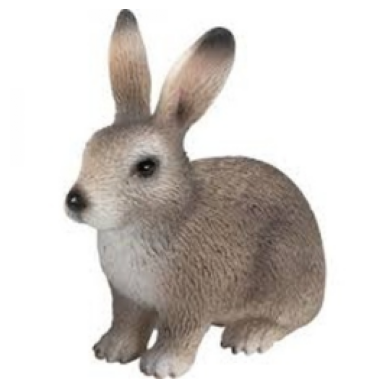

In [20]:
# Load the first image
image = load_image(train_image_paths[0])

# Plot the Image
plt.imshow(image)
plt.axis('off')
plt.show()

In [21]:
# select a random path
idx = np.random.randint(len(train_image_paths))
path = train_image_paths[idx]

print(f"The File Path : {path}")

The File Path : /content/gdrive/MyDrive/PR_dataset/train-cat-rabbit/rabbit/rabbit.90.jpg


In [22]:
# Split the path 
path.split('/')[-2]

'rabbit'

In [23]:
class_mapping = {name:index for index, name in enumerate(class_names)}
class_mapping

{'cat': 0, 'rabbit': 1}

In [24]:
def extract_label(path:str, mapping:dict) -> int:
    
    '''
    The function takes in a path and mine the class label out of it.
    
    Inputs : 
        path    : The path from which the label is to be extracted.
        mapping : The mapping, which converts the class name to class label.
    
    Output :
        label : The integer label extracted from the path.
        
    '''
    
    # split path to get the class name
    label = path.split("/")[-2]
    
    # Apply the mapping to get the class label
    label = mapping[label]
    
    # Return the label
    return label 

In [25]:
extract_label(path, class_mapping)

1

In [26]:
def load_data(paths:list,  mapping:dict, size:tuple = (256,256), tf_data=False, BATCH_SIZE:int=32):
    
    '''
    This function is based on the other functions listed below : 
        1. load_image
        2. collect_label
    
    This function starts with creating a space for the images & labels to be loaded. Then it iterates through the file 
    paths and load the image & the respective label. It stores these loaded image & label. If needed, it converts this 
    numpy array data into a tensorflow data. At last, it returns the generated data.
    
    Inputs : 
        paths      : A list of all file paths of the files to be loaded.
        mapping    : This is used by the collect_label function to map the class name to a class label.
        size       : This is used by the load_image function, It represents the desired size of the image.
        tf_data    : True or False, Depending on the need of Tensorflow data.
        BATCH_SIZE : Represents the Batch Size of the Tensorflow data.
    
    Outputs : 
        all_images  : A NumPy array of all the collected images.
        all_labels  : A NUmPy array of all the collected labels.
        tf_ds       : A Tensorflow data set version of the NumPy data(Depends on tf_data).     '''
    
    # Create Space for Images and Labels
    all_images = np.empty(shape=(len(paths), *size, 3), dtype=np.float32)
    all_labels = np.empty(shape=(len(paths), 1), dtype=np.int32)
    
    # Iterate through the File Paths
    index = 0
    for path in tqdm(paths, desc="Loading"):
        
        # Load the Image
        image = load_image(image_path=path, size=size, normalize=True)
        
        # Collect the Label
        label = extract_label(path=path, mapping=mapping)
        
        # Add the images to the space
        all_images[index] = image
        all_labels[index] = label
        index += 1
    
 # Return a Tensorflow data set
    if tf_data:
        tf_ds = tfd.Dataset.from_tensor_slices((all_images, all_labels))
        tf_ds = tf_ds.cache().shuffle(1000).batch(BATCH_SIZE, drop_remainder=True)
        tf_ds = tf_ds.prefetch(tfd.AUTOTUNE)
        return (all_images, all_labels), tf_ds     
    
    # Return the images and Labels
    return all_images, all_labels

In [27]:
# Load Training Data
(train_images, train_labels), train_set = load_data(paths=train_image_paths, mapping=class_mapping, tf_data=True)

# Load Validation Data
(valid_images, valid_labels), valid_set = load_data(paths=valid_image_paths, mapping=class_mapping, tf_data=True)

# Load Testing Data
(test_images, test_labels),   test_set  = load_data(paths=test_image_paths,  mapping=class_mapping, tf_data=True)

Loading: 100%|██████████| 104/104 [00:20<00:00,  5.11it/s]
Loading: 0it [00:00, ?it/s]


In [28]:
# Checking
train_set, valid_set, test_set

(<_PrefetchDataset element_spec=(TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 1), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 1), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 1), dtype=tf.int32, name=None))>)

In [29]:
def show_images(images:list, labels:list, class_names:list, model:None = None, GRID:tuple = (5,6), SIZE:tuple = (30,25)) -> None:
    
    '''
    This function is responsible for creating a plot of multiple images & labels from the given dataset. The function does so by 
    plotting multiple subplots and grouping them together to make a single big plot. During the process, it randomly selects images 
    from the given data set. If a model is supplied to the function, then it will also make predictions.
    
    Inputs :
        images      : List/array of all the Images.
        labels      : List/array of all the Labels.
        class_names : List of the names of the class.
        model       : A predictive model that will make prediction on the respective image(by default its None).
        GRID        : This represents the total distribution of the plots i.e. [n_rows, n_cols]
        SIZE        : Ths size of the final figure.
    '''
    
    
    # Plotting Configuration 
    plt.figure(figsize=SIZE)
    n_rows, n_cols = GRID[0], GRID[1]
    n_images = n_rows * n_cols
    
    # Iterate through the Plot 
    for i in range(1, n_images+1):
        # Select image & label randomly
        index = np.random.randint(len(images))
        image, label = images[index], labels[index]
        title = class_names[int(label)]
        
        # If model is present, make prediction
        if model is not None:
            image = tf.expand_dims(tf.cast(image, tf.float32), axis=0)
            proba = model.predict(image)
            pred  = class_names[int(np.round(proba))]
            title = "True : {}\nPred : {}".format(title, pred)
            
        # Plot the Image
        plt.subplot(n_rows, n_cols, i)
        plt.imshow(tf.squeeze(image))
        plt.title(title.title())
        plt.axis('off')
    
    # Show Final Figure
    plt.show()

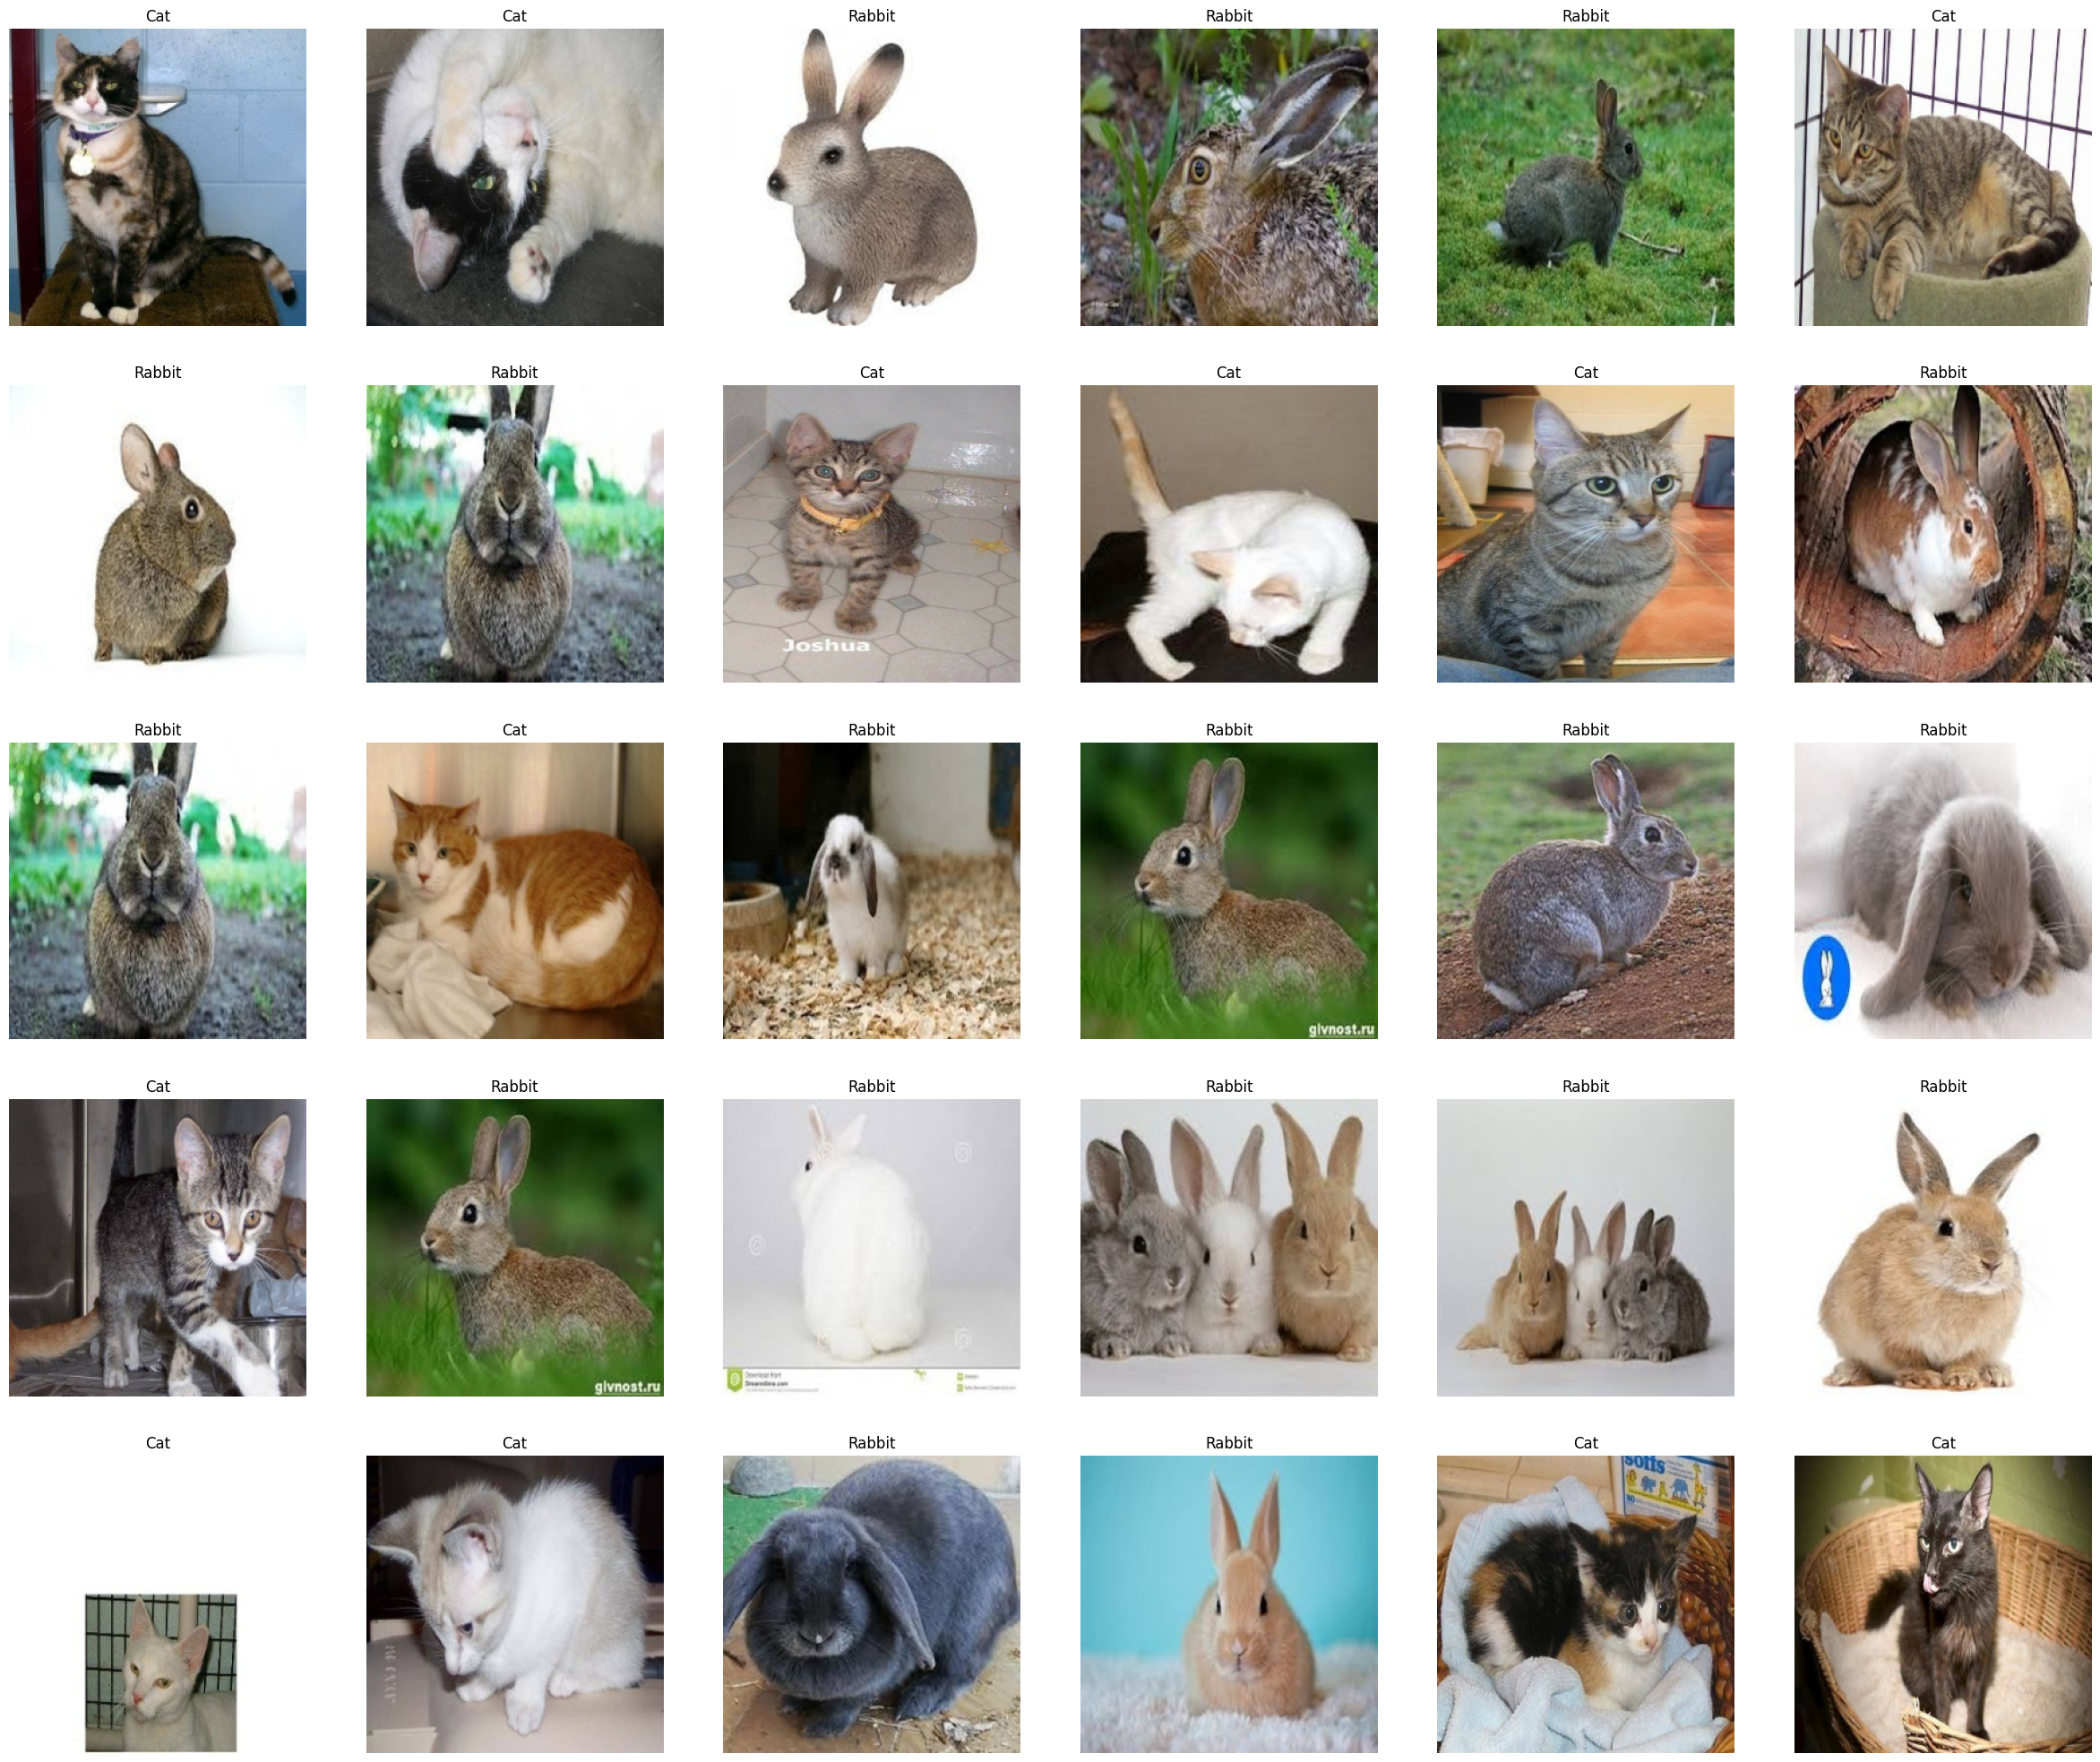

In [30]:
show_images(train_images, train_labels, class_names=class_names)

In [31]:
data_aug = Sequential(layers=[
    Input(shape=(256, 256, 3), name="InputLayer"),
    RandomFlip(mode='horizontal_and_vertical', name="RandomFlip"),
    RandomRotation(factor=10, fill_mode='reflect', name="RandomRotation"),
    RandomContrast(factor=0.5, name="RandomContrast")
], name="DataAugmetor")

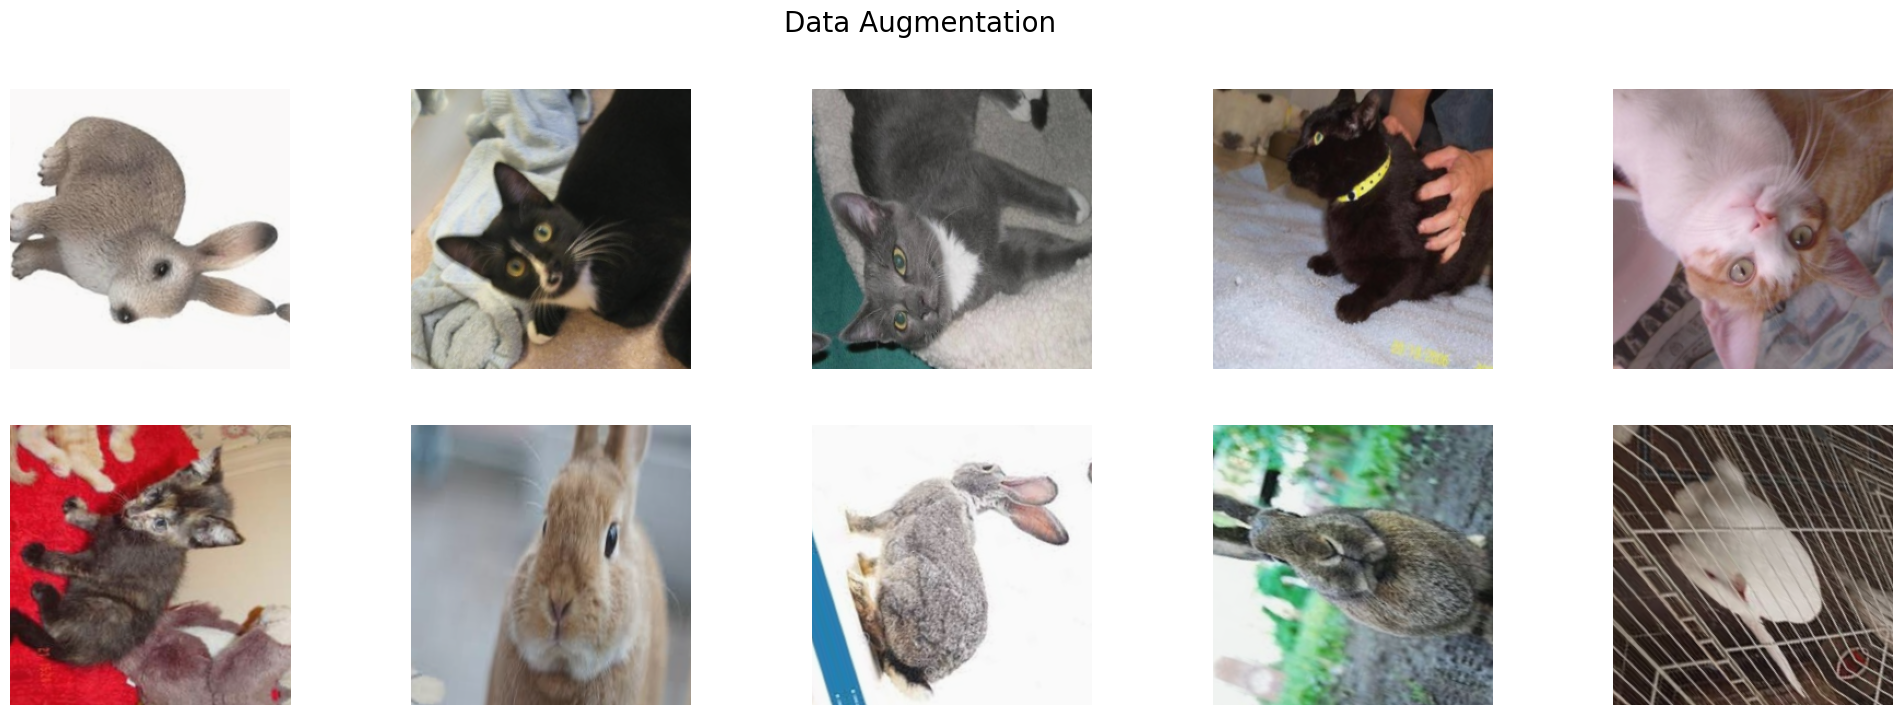

In [32]:
# Augment the images
aug_images = data_aug(train_images[:10])

# Show the Augmented Image
plt.figure(figsize=(25,8))
plt.suptitle("Data Augmentation", fontsize=20)
for i in range(len(aug_images)):
    plt.subplot(2,5,i+1)
    plt.imshow(aug_images[i])
    plt.axis('off')
plt.show()

In [33]:
# # Give Model a Name
model_name = 'resnet50V2_v1'

# # Load the Pre Trained Model
base_model = ResNet50V2(include_top=False, weights='imagenet')

# # Freeze the Model Weights
base_model.trainable = True

# # Create a New Model Architecture
model = Sequential([
     Input(shape=(256, 256, 3)),
     data_aug,
     BatchNormalization(),
     base_model,
     BatchNormalization(),
     GAP(),
     Dropout(0.2),
     Dense(1, activation='sigmoid')
 ])

# # Model Summary
model.summary()

# # Compile Model
model.compile(
     loss='binary_crossentropy',
     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
     metrics=['accuracy'])

# # Model Callbacks 
callbacks = [
     EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True),
     ModelCheckpoint(model_name+".h5", monitor="val_loss", save_best_only=True)
]

# # Model Training
history = model.fit(train_set, validation_data=valid_set, callbacks=callbacks, epochs=2)

94668760/94668760 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 DataAugmetor (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 3)      12        
 ormalization)                                                   
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 2048)       8192      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                  

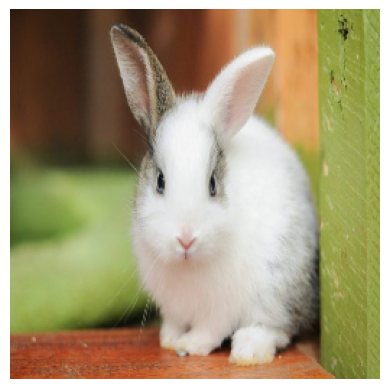

1/1 [==============================] - 2s 2s/step
Rabbit: [[0.7059943]]
Cat: [[0.2940057]]


In [37]:
import tensorflow as tf
from PIL import Image
# Load the pre-trained CNN model
model = tf.keras.models.load_model('/content/resnet50V2_v1.h5')

# Define a function to preprocess new images
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((256, 256))  # Resize to match input shape of the model
    img_array = np.array(img)  # Convert to numpy array
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Define a function to classify new images using the pre-trained model
def classify_image(image_path):
    image = load_image(image_path)

# Plot the Image
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    # Preprocess the input image
    img_array = preprocess_image(image_path)

    # Use the pre-trained model to make predictions
    predictions = model.predict(img_array)
    #print(predictions)
    # label=extract_label(predictions,class_mapping)
    # label
    # # # Print the predicted class and its probability
    # if (predictions > 0.5):
    #      print('Rabbit')
    # else:
    #      print('Cat')
    print("Rabbit:",predictions)
    print("Cat:",1-predictions)

# Example usage
classify_image('/content/download2.jpg')